# A simple pycwl demo

In [1]:
import sys
import matplotlib
sys.path.append("../pycwl/")
import pycwl

### Making command-line tools

* We make a CommandLineTool which runs multiply.py

In [2]:
multiply_clt = pycwl.CommandLineTool(baseCommand = ["python", "multiply.py"])

* We add inputs and outputs to this CommandLineTool. It takes two integers as input and generates one integer as output. We also need to tell the CommandLineTool how (which and in which order) to put the inputs as arguments on the command-line. 

* For the inputs we use an IO object (input-output) which will keep track of the datatype and can have default values.

In [3]:
multiply_clt.inputs["mlt_nr1"]= pycwl.IO(datatype = "int", default_value=5)
multiply_clt.inputs["mlt_nr2"]= pycwl.IO(datatype = "int")
multiply_clt.outputs["multiply_result"] = pycwl.IO(datatype = "int", output_type="stdout")
multiply_clt.arguments = [multiply_clt.inputs["mlt_nr1"],multiply_clt.inputs["mlt_nr2"]]

* Just a little check inbetween to see whats in our CommandLineTool

In [4]:
print (multiply_clt.baseCommand)
print (multiply_clt.inputs)
print (multiply_clt.outputs)
print (multiply_clt.arguments)
print (multiply_clt.outputs["multiply_result"].output_type)

['python', 'multiply.py']
{'mlt_nr2': <pycwl.IO object at 0x0000000006B4B128>, 'mlt_nr1': <pycwl.IO object at 0x0000000006B4B160>}
{'multiply_result': <pycwl.IO object at 0x0000000006B4B198>}
[<pycwl.IO object at 0x0000000006B4B160>, <pycwl.IO object at 0x0000000006B4B128>]
stdout


* We make a second command-line tool that will add two numbers together (add.py)

In [5]:
add_clt = pycwl.CommandLineTool(baseCommand = ["python", "add.py"])
add_clt.inputs["add_nr1"]= pycwl.IO(datatype = "int", default_value=5)
add_clt.inputs["add_nr2"]= pycwl.IO(datatype = "int")
add_clt.outputs["add_result"] = pycwl.IO(datatype = "int", output_type="stdout")
add_clt.arguments = [add_clt.inputs["add_nr1"],add_clt.inputs["add_nr2"]]

### Making a WorkFlow

* To make a workflow we make a WorkFlow object

In [6]:
calc_flow = pycwl.Workflow()

* We add inputs and outputs in typical CWL style

In [7]:
calc_flow.inputs["flow_nr1"] = pycwl.IO(datatype = "int")
calc_flow.inputs["flow_nr2"] = pycwl.IO(datatype = "int")
calc_flow.inputs["flow_nr3"] = pycwl.IO(datatype = "int")
calc_flow.outputs["add/add_result"] = pycwl.IO(datatype = "int")

* Now we make a Step containing the multiply_clt process. We need to map multiply_clt's inputs, in this case we map them to the inputs of the workflow

In [8]:
step = pycwl.Step(process = multiply_clt)
step.input_map = {"flow_nr1": "mlt_nr_1",
              "flow_nr2": "mlt_nr2"}
step.outputs = {"multiply_result"}

* And we add the step to the workflow

In [9]:
calc_flow.steps["multiply"] = step

* In a different way we add the add_clt process to the workflow also. Note we map the inputs of add to 1) the output of multiply and 2) an input of the workflow

In [10]:
calc_flow.steps["add"] = pycwl.Step(
    process=add_clt,
    input_map={
        "multiply/multiply_result": "add_nr_1",
        "flow_nr3": "add_nr2",
    },
    outputs={
        "add_result",
    },
)

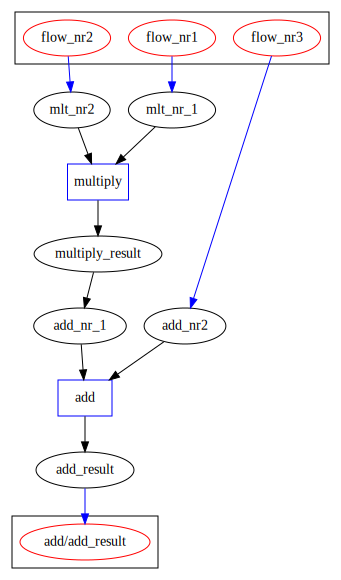

In [11]:

dot = calc_flow.get_dot()
dot